# Exploratory Data Analysis

In [17]:
# Begin by importing standard libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sn

In [18]:
# Load and preview the dataset
train_data = pd.read_csv('/kaggle/input/nlp-fintech-project-2/stock_data.csv')
train_data

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


The dataset contains 5791 rows and 2 columns, **Text** and **Sentiment**. A **Sentiment** value of 1 indicates positive sentiment whereas a value of -1 indicates a negative sentiment. We proceed to plot a graph that compares the number of positive and negative sentiments.

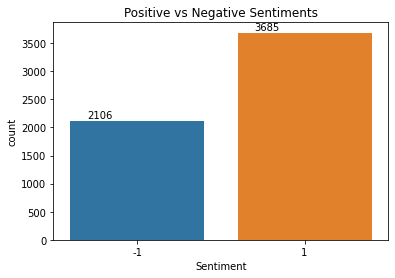

In [19]:
plt.title("Positive vs Negative Sentiments")
plot = sn.countplot(x = 'Sentiment', data=train_data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))

As seen from the plot above, there is a fairly equal distribution of positive and negative sentiments at a ratio of approximate 4:3 positive to negative sentiments. 

# Method

In [20]:
# random split train and test data
index = train_data.index
train_data['random_number'] = np.random.randn(len(index))
train = train_data[train_data['random_number'] <= 0.8]
test = train_data[train_data['random_number'] > 0.8]

Logistic regression will be used. Since it is unable to understand text data, we transform the sentiment text into a bag of words model using a CountVectorizer. A bag of words model contains a sparse matrix of integers where the number of occurrences of each word in the sentiment will be counted and printed.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Text'])
test_matrix = vectorizer.transform(test['Text'])

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [23]:
X_train = train_matrix
X_test = test_matrix
y_train = train['Sentiment']
y_test = test['Sentiment']

In [24]:
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
predictions = lr.predict(X_test)

In [26]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[284, 107],
       [151, 698]])

In [27]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

          -1       0.65      0.73      0.69       391
           1       0.87      0.82      0.84       849

    accuracy                           0.79      1240
   macro avg       0.76      0.77      0.77      1240
weighted avg       0.80      0.79      0.79      1240



The model achieved a decent accuracy of 80% on the test data.